# [ PART 05. 정형 데이터마이닝 ] - 1장. 데이터 분할과 성과분석

## 1. 데이터 분할
- 데이터 분할은 train, validation, test data로 분할하여 모델 평가에 사용
- 전체데이터에서 각각 train(50%), validataion(30%), test(20%)로 분할하며, 데이터의 갯수가 작으면 validation을 생략하고 training과 test를 6:4 또는 7:3으로 두고 분석을 진행.

### `sample()`

In [4]:
# sample( x, 			# x는 추출하고자 하는 숫자
#	      size, 			# size는 x를 얼만큼 뽑아낼지 정함
#	      replace = FALSE, 	# replace가 T이면 복원추출, F이면 비복원추출
#	      prob = NULL) 		# prob는 적은 숫자를 추출할 때, 확률을 정해 샘플을 뽑음


# ex) credit 데이터셋 분할하기

# 데이터 분할 전, 데이터 불러오기
credit.df <- read.csv( "C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\german_credit_dataset.csv", header = TRUE, sep = ",")  # 데이터 로드

nrow(credit.df)  # 분석 데이터의 행 개수 파악

[1] 1000

In [5]:
set.seed(1111)  # 난수를 동일하게 추출되도록 고정시키는 함수
idx<-sample(3,nrow(credit.df),      # idx에 1,2,3을 credit 데이터 행 개수와 동일하게 추출
            replace=T,            # 랜덤 복원추출을 실시 
            prob=c(0.5,0.3,0.2))  # 1은 train으로 전체의 50%,
                                  # 2는 validation으로 전체의 30%, 3은 test로 전체의 20% 

train<-credit.df[idx==1,]     # 분석 데이터에 idx 값과 비교하여, idx가 1인 행은 train으로 추출
validation<-credit.df[idx==2,]
test<-credit.df[idx==3,]

nrow(train)
nrow(validation)
nrow(test)

[1] 483

[1] 293

[1] 224

### `createDataPartition()`
- caret 패키지에서 종속변수를 고려한 train, test 데이터를 분할하는 함수를 지원

In [6]:
#createDataPartition( y,         #분류(또는 레이블)
#                     times=1,   #분할의 수를 지정
#                     p=0.7,     #훈련 데이터에서 사용할 데이터의 비율
#                     list=TRUE) #결과를 리스트로 반환할지 여부, FALSE는 행렬로 반환

#ex) credit 데이터셋 분할하기

# install.packages("caret")
library(caret)
part<-createDataPartition(credit.df$credit.rating,   # 목적변수인 credit.rating를 지정                            
                          times=1,                   # 생성할 데이터 분할은 1개로 지정                            
                          p=0.7)                     # 훈련데이터를 70%로 설정

parts<-as.vector(part$Resample1)  # 행번호를 벡터형으로 변환
train <- credit.df[parts,]
test <- credit.df[-parts,]

nrow(train)
nrow(test)

[1] 700

[1] 300

## 2. 성과분석
- 성과분석은 데이터마이닝을 통해 train set으로 모델링 한 뒤, test set으로 정확도, 특이도 등을 알아보기 위한 과정

### 2.1. 오분류표(Confusion Matrix)
- caret패키지에서 제공하는 confusionMatriox를 활용하면 정확도, 특이도 등이 손쉽게 정리된 결과를 얻을 수 있음.

In [7]:
# confusionMatrix( data,        #예측값 또는 분할표(모델링을 통해 얻은 값)
#                  reference)   #실제값

#ex)confusionMatrix를 활용한 성과분석

library(caret)    #라이브러리가 한번 활성화 되었다면 또 활성화하지 않아도 됨

predicted<-factor(c(1,0,0,1,1,1,0,0,0,1,1,1))
actual<-factor(c(1,0,0,1,1,0,1,1,0,1,1,1))

xtabs(~predicted + actual)    #분할표 그리기

         actual
predicted 0 1
        0 3 2
        1 1 6

In [8]:
sum(predicted==actual)/NROW(actual)   #정확도를 직접 식으로 계산

[1] 0.75

In [9]:
confusionMatrix(predicted, actual)   

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 3 2
         1 1 6
                                          
               Accuracy : 0.75            
                 95% CI : (0.4281, 0.9451)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.3931          
                                          
                  Kappa : 0.4706          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.7500          
            Specificity : 0.7500          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.8571          
             Prevalence : 0.3333          
         Detection Rate : 0.2500          
   Detection Prevalence : 0.4167          
      Balanced Accuracy : 0.7500          
                                          
       'Positive' Class : 0               
                                          

### 2.2. ROC CURVE
- 이진 분류 분석 모형을 비교 분석 결과를 가시화할 수 있다는 점에서 유용한 평가 도구.
- ROC 그래프의 가로축은 1-특이도, 세로축은 민감도로 구성되어 이 두 값의 관계로 모형을 평가
- 모형의 성과를 평가하는 기준은 ROC 그래프의 밑부분 면적(Area Under the ROC Curve,AUC)이 넓을수록 좋은 모형

Warning message:
"package 'ROCR' was built under R version 3.6.3"

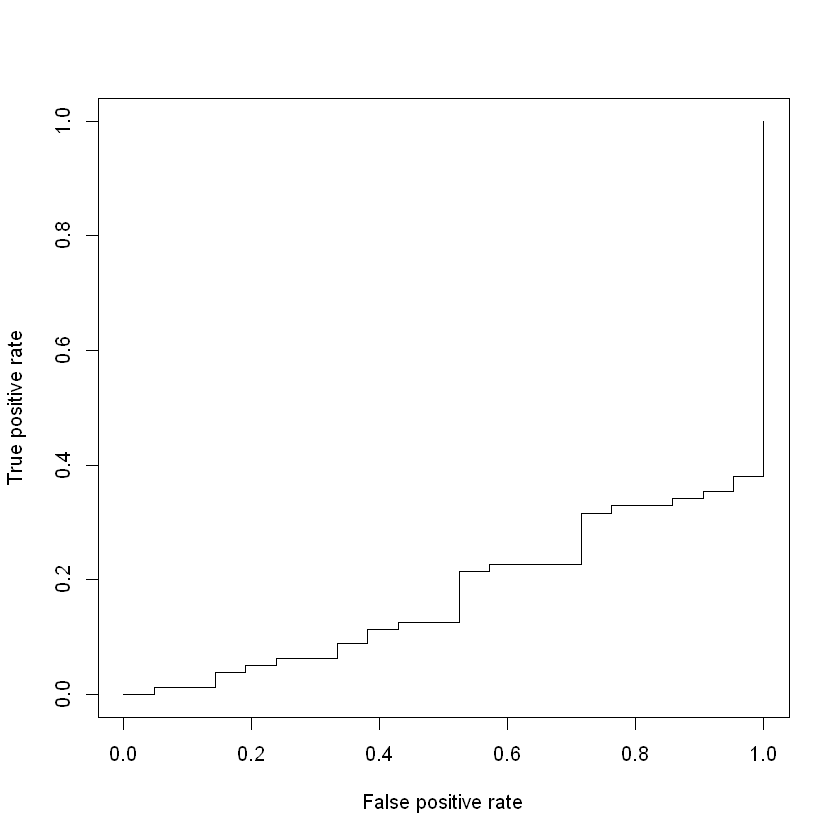

In [10]:
# prediction( predictions,  #예측값(수치형으로 변환해야 함)
#             labels)       #실제값(수치형으로 변환해야 함)

# performance( prediction.obj,  #prediction 객체
#              acc(accuracy), fpr(FP Rate), tpr(TP Rate), rec(recall)등을 지정할 수 있음
#            )

#ROC CURVE 예시(probs는 분류알고리즘이 예측한 값, labels는 실제 분류가 저장된 벡터)

# install.packages("ROCR")
library(ROCR)

set.seed(12345)

probability<-runif(100)    #runif 함수는 균일분포값을 무작위로 추출하는 함수

labels<-ifelse(probability>0.5&runif(100)<0.4,1,2)

pred<-prediction(probability, labels)       #prediction 함수로 ROC 커브를 그릴 값을 예측

plot(performance(pred, "tpr","fpr"))  #ROC CURVE 그래프 그리기

In [11]:
performance(pred,"auc")@y.values      #AUC 값을 확인할 수 있음, 임의 값으로 한것이라 낮게 나타남

[[1]]
[1] 0.1735986

# [ PART 05. 정형 데이터마이닝 ] - 2장. 분류 분석
- 분류분석은 데이터가 어떤 그룹에 속하는지 예측하는데 사용하는 기법.
- 의사결정나무, 앙상블기법, 인공신경망 등이 있음.
- ADP 실기에서는 "분류기법들을 활용해 가장 정확도같은 지표가 좋은 기법과 결과를 보고서에 나타내라"는 형식의 문제가 출제됨.

## 1. 로지스틱 회귀분석
- 반응변수가 범주형인 경우 적용되는 회귀분석
- 새로운 설명변수가 주어질 때 반응변수의 각 범주에 속할 확률이 얼마인지를 추정하여 추정확률을 기준치에 따라 분류하는 목적으로 활용

In [12]:
credit<-read.csv("C:\\Users\\Administrator\\GitHub\\TIL\\ADP_study\\rawdata\\credit_final.csv")

In [13]:
class(credit$credit.rating)

[1] "integer"

In [14]:
credit$credit.rating<-factor(credit$credit.rating)
str(credit)

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 

In [15]:
set.seed(123)

idx<-sample(1:nrow(credit),nrow(credit)*0.7,replace=FALSE)
train<-credit[idx,]
test<-credit[-idx,]

In [16]:
# ex) 앞서 분할한 credit 데이터의 train 데이터로 로지스틱 회귀모델을 만들어 보자.

# glm( formula,
#      data,
#      family,      #"binomial","gaussian","Gamma","poisson" 등이 있음
#      ...)

logistic<-glm(credit.rating~., 
              data=train, 
              family="binomial")

summary(logistic)


Call:
glm(formula = credit.rating ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4763  -0.7811   0.4133   0.7147   2.0078  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -4.249e+00  1.419e+00  -2.994 0.002754 ** 
account.balance                 8.687e-01  1.224e-01   7.096 1.28e-12 ***
credit.duration.months         -2.145e-02  1.072e-02  -2.000 0.045501 *  
previous.credit.payment.status  5.635e-01  1.897e-01   2.971 0.002973 ** 
credit.purpose                 -4.133e-01  1.111e-01  -3.721 0.000198 ***
credit.amount                  -7.722e-05  5.011e-05  -1.541 0.123341    
savings                         3.531e-01  9.689e-02   3.645 0.000268 ***
employment.duration             1.311e-01  1.003e-01   1.307 0.191067    
installment.rate               -1.986e-01  1.002e-01  -1.983 0.047357 *  
marital.status                  1.724e-01  9.722e-02   1

In [17]:
# 최적 회귀방정식의 선택
# step( scope,        #변수선택 과정에서 설정할 수 있는 가장 큰 모형 혹은 가장 작은 모형을 설정
#                    #전진선택법에서는 가장 큰모형으로, 후진제거법에서는 가장 작은 모형으로 설정
#       direction,    #변수 선택법(forward, backward, stepwise)
#       ...)

# ex) 앞서 분할한 credit 데이터의 train 데이터로 로지스틱 회귀모델을 만들어 보자.

step.logistic<-step(glm(credit.rating~1, data=train, family="binomial"),
                    scope=list(lower=~1, upper=~account.balance+credit.duration.months+previous.credit.payment.status+
                                 credit.purpose+credit.amount+savings+employment.duration+installment.rate+
                                 marital.status+guarantor+residence.duration+current.assets+age+other.credits+
                                 apartment.type+bank.credits+occupation+dependents+telephone+foreign.worker),
                    direction="both")

Start:  AIC=848.57
credit.rating ~ 1

                                 Df Deviance    AIC
+ account.balance                 1   761.97 765.97
+ savings                         1   817.12 821.12
+ credit.duration.months          1   818.40 822.40
+ previous.credit.payment.status  1   821.29 825.29
+ current.assets                  1   832.86 836.86
+ credit.amount                   1   835.30 839.30
+ age                             1   835.37 839.37
+ credit.purpose                  1   837.72 841.72
+ employment.duration             1   837.80 841.80
+ other.credits                   1   839.28 843.28
+ foreign.worker                  1   839.45 843.45
+ installment.rate                1   842.94 846.94
+ marital.status                  1   843.24 847.24
+ telephone                       1   843.75 847.75
+ apartment.type                  1   844.24 848.24
<none>                                846.57 848.57
+ occupation                      1   845.33 849.33
+ guarantor               

In [18]:
summary(step.logistic)


Call:
glm(formula = credit.rating ~ account.balance + credit.duration.months + 
    previous.credit.payment.status + savings + credit.purpose + 
    current.assets + apartment.type + foreign.worker + guarantor + 
    age + other.credits + marital.status + installment.rate, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4734  -0.8128   0.4436   0.7404   1.8425  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -4.453085   1.295853  -3.436 0.000589 ***
account.balance                 0.877274   0.120850   7.259 3.89e-13 ***
credit.duration.months         -0.030855   0.008188  -3.768 0.000164 ***
previous.credit.payment.status  0.484631   0.165356   2.931 0.003381 ** 
savings                         0.377087   0.095484   3.949 7.84e-05 ***
credit.purpose                 -0.395226   0.108290  -3.650 0.000263 ***
current.assets                 -0.314207   0.

In [19]:
# 예측을 통한 정확도 확인
library(caret)
pred<-predict(step.logistic,test[,-1],type="response")             #predict 함수를 사용한 예측
pred1<-as.data.frame(pred)                                         #결과를 data.frame으로 변형
pred1$grade<-ifelse(pred1$pred<0.5,pred1$grade<-0,pred1$grade<-1)  #숫자값만 나오므로, 0.5를 기준으로 0, 1 범주 추가

summary(step.logistic)


Call:
glm(formula = credit.rating ~ account.balance + credit.duration.months + 
    previous.credit.payment.status + savings + credit.purpose + 
    current.assets + apartment.type + foreign.worker + guarantor + 
    age + other.credits + marital.status + installment.rate, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4734  -0.8128   0.4436   0.7404   1.8425  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -4.453085   1.295853  -3.436 0.000589 ***
account.balance                 0.877274   0.120850   7.259 3.89e-13 ***
credit.duration.months         -0.030855   0.008188  -3.768 0.000164 ***
previous.credit.payment.status  0.484631   0.165356   2.931 0.003381 ** 
savings                         0.377087   0.095484   3.949 7.84e-05 ***
credit.purpose                 -0.395226   0.108290  -3.650 0.000263 ***
current.assets                 -0.314207   0.

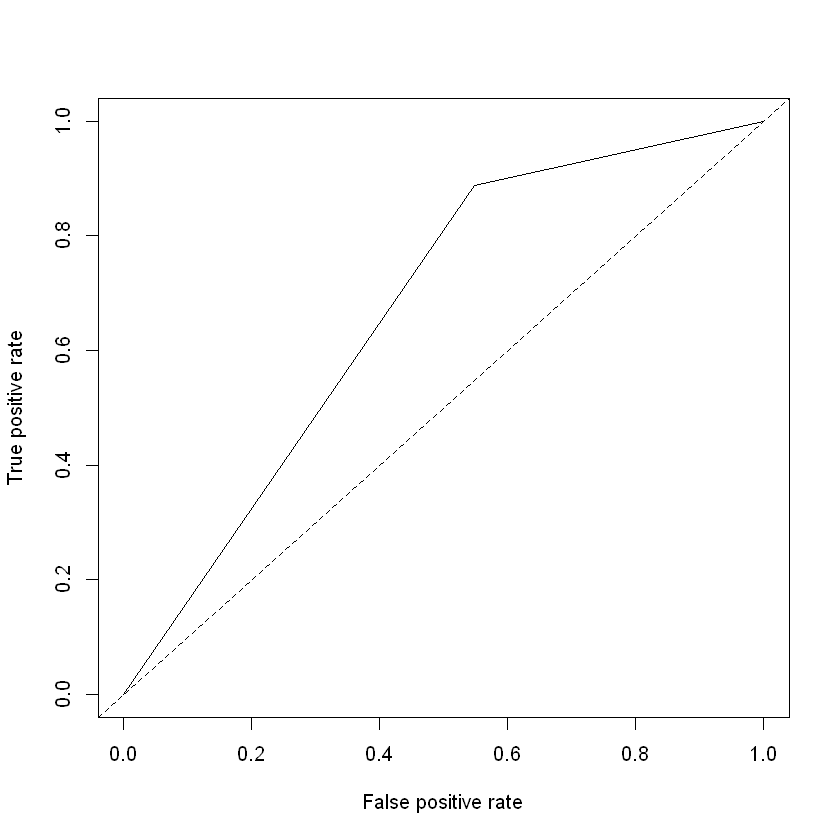

In [20]:
library(ROCR)
pred.logistic.roc<-prediction(as.numeric(pred1$grade),as.numeric(test[,1]))
plot(performance(pred.logistic.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")    

In [21]:
performance(pred.logistic.roc,"auc")@y.values             #auc값이 67%로 성능이 좋지않음.

[[1]]
[1] 0.6702182

In [22]:
# 다항 로지스틱 회귀분석 실시

# multinom( formula,   #수식
#           data            #데이터
#           ...)

#데이터 분할

idx<-sample(1:nrow(iris),nrow(iris)*0.7,replace=FALSE)
train.iris<-iris[idx,]
test.iris<-iris[-idx,]

# install.packages("nnet")
library(nnet)



In [23]:
mul.iris<-multinom(Species~., train.iris)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 11.814376
iter  20 value 5.835729
iter  30 value 5.729057
iter  40 value 5.720449
iter  50 value 5.715789
iter  60 value 5.711880
iter  70 value 5.708283
iter  80 value 5.708073
iter  90 value 5.707557
iter 100 value 5.707382
final  value 5.707382 
stopped after 100 iterations


In [24]:
pred.mul<-predict(mul.iris,test.iris[,-5])

confusionMatrix(pred.mul, test.iris[,5])

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         10         0
  virginica       0          0        20

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.4444     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

## 2. 의사결정나무
- 의사결정나무를 실행하기 위한 함수는 tree, ctree, rpart 등의 방법이 있음.
- tree함수는 불순도의 측도로 엔트로피 지수를 사용.
- ctree함수는 분석 결과에서 별도로 가지치기할 필요가 없지만 입력 변수는 31개까지만 입력가능.
- rpart함수는 CART 방법을 사용.

In [31]:
# 1) rpart : CART(Classification and Regression Trees)를 사용했으며, GINI INDEX를 가장 많이 감소시켜주는 변수가
#         : 영향을 가장 많이 끼치는 변수가 됨.

# rpart( formula,     
#        data,        
#        method,      # "anova", "poisson", "class", "exp" 4가지 방법이 있음. 그 중 분류인 class 선택
#        control=rpart.control())   # 의사결정나무를 만들때 사용할 option을 rpart.control로 처리

# ex) 앞서 분할한 credit 데이터의 train 데이터로 의사결정나무 모델을 만들어 보자.

# install.packages(c("rpart","rpart.plot"))
library(caret)
library(rpart)
library(rpart.plot)

dt.model <- rpart(credit.rating~.,           #종속변수(credit.rating)와 모든 변수를 독립변수로 사용
                  method="class",            #method는 anova, poisson, exp 등이 있으며, 분류인 class 선택
                  data=train, 
                  control = rpart.control(maxdepth=5,    #의사결정나무의 최대 깊이는 5개까지
                                          minsplit=15))  #노드에서 최소 관측치는 15개 이상

dt.model

n= 700 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 700 205 1 (0.2928571 0.7071429)  
   2) account.balance< 2.5 375 168 1 (0.4480000 0.5520000)  
     4) credit.duration.months>=22.5 160  69 0 (0.5687500 0.4312500)  
       8) savings< 2.5 128  47 0 (0.6328125 0.3671875)  
        16) credit.purpose>=1.5 111  35 0 (0.6846847 0.3153153) *
        17) credit.purpose< 1.5 17   5 1 (0.2941176 0.7058824) *
       9) savings>=2.5 32  10 1 (0.3125000 0.6875000) *
     5) credit.duration.months< 22.5 215  77 1 (0.3581395 0.6418605)  
      10) previous.credit.payment.status< 1.5 15   3 0 (0.8000000 0.2000000) *
      11) previous.credit.payment.status>=1.5 200  65 1 (0.3250000 0.6750000) *
   3) account.balance>=2.5 325  37 1 (0.1138462 0.8861538) *

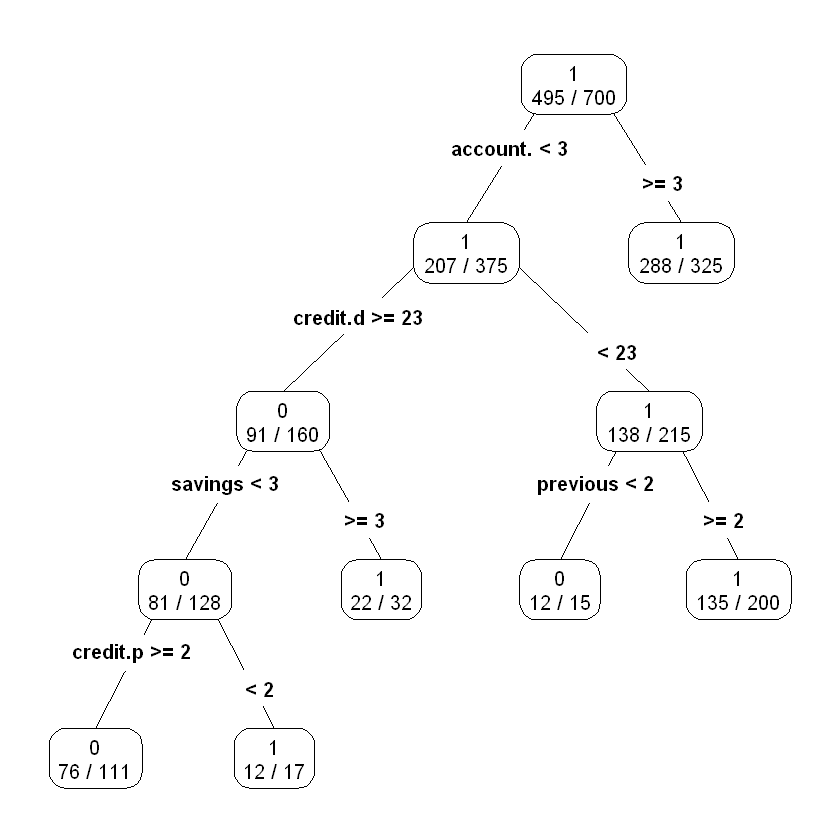

In [32]:
prp(dt.model,type=4,extra = 2)   

In [27]:
dt.model$cptable    

CP,nsplit,rel error,xerror,xstd
0.05365854,0,1.0000000,1.0000000,0.05873225
0.04390244,3,0.8341463,0.9853659,0.05847732
0.03414634,4,0.7902439,0.9804878,0.05839093
0.01000000,5,0.7560976,0.9756098,0.05830383


In [28]:
opt<-which.min(dt.model$cptable[,"xerror"])   
cp<-dt.model$cptable[opt,"CP"]

prune.c<-prune(dt.model,cp=cp)
plotcp(dt.model)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): png() 장치를 시작할 수 없습니다


plot without title

In [29]:
pred.dt<-predict(dt.model,test[,-1],type="class")   #의사결정나무 모델로 test 데이터를 예측
table(pred.dt,test[,1])                             #table을 통해 예측 테이블 확인

       
pred.dt   0   1
      0  42  21
      1  53 184

In [30]:
confusionMatrix(data=pred.dt,                       #confusionMatrix를 통해 성과 분석 실시.
                reference=test[,1],              #정확도는 75.3% 등의 성능을 확인할 수 있음.
                positive='1')  

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  42  21
         1  53 184
                                          
               Accuracy : 0.7533          
                 95% CI : (0.7005, 0.8011)
    No Information Rate : 0.6833          
    P-Value [Acc > NIR] : 0.0047614       
                                          
                  Kappa : 0.3734          
                                          
 Mcnemar's Test P-Value : 0.0003137       
                                          
            Sensitivity : 0.8976          
            Specificity : 0.4421          
         Pos Pred Value : 0.7764          
         Neg Pred Value : 0.6667          
             Prevalence : 0.6833          
         Detection Rate : 0.6133          
   Detection Prevalence : 0.7900          
      Balanced Accuracy : 0.6698          
                                          
       'Positive' Class : 1               
                              

In [31]:
pred.dt.roc<-prediction(as.numeric(pred.dt),as.numeric(test[,1]))
plot(performance(pred.dt.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")   

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): png() 장치를 시작할 수 없습니다


plot without title

In [32]:
performance(pred.dt.roc,"auc")@y.values             #auc값이 67%로 성능이 우수하지 않음.

[[1]]
[1] 0.6698331

In [33]:
#다지 분류
dt.model2<-rpart(Species~., data=train.iris)

prp(dt.model2,type=4,extra = 2)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): png() 장치를 시작할 수 없습니다


plot without title

In [34]:
pred.dt2<-predict(dt.model2,test.iris[,-5],type="class")

confusionMatrix(data=pred.dt2,reference=test.iris[,5])  

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         10         1
  virginica       0          0        19

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.4444          
    P-Value [Acc > NIR] : 8.12e-15        
                                          
                  Kappa : 0.9656          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9500
Specificity                 1.0000            0.9714           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9615
P

## 3. 앙상블(ensemble) 기법
- 앙상블 기법은 주어진 자료로부터 여러 개의 예측모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측 모형을 만드는 방법. 학습방법이 가장 불안전한 의사결정나무에 주로 사용

### 3.1. 배깅
- 주어진 자료에서 여러개의 붓스트랩자료를 생성해 각 붓스트랩 자료에 예측모형을 만든 후 결합하여 최종 예측모형을 만드는 방법.
- 붓스트랩은 주어진 자료에서 동일한 크기의 표본을 랜덤 복원추출로 뽑은 자료
- 보팅(voting)은 여러 개의 모형으로부터 산출된 결과를 다수결애 의해 최종결과를 선정하는 과정
- 배깅에서는 가지치기를 하지 않고 최대로 성장한 의사결정나무 활용

In [ ]:
# adabag 패키지의 bagging 함수를 활용하여 모델을 개발
# bagging(formula,        
#         data, 
#         mfinal,        #mfinal : 반복수 또는 트리의 수(default=100)
#         control, ...)  #control 인자를 통해 option 활용 가능(최대 깊이, 최소 노드 등)

#함수를 활용하여 분석 결과를 확인하기 보다 train한 데이터로 test 데이터를 예측하여 confusionMatrix를 주로 확인함

# ex) 앞서 분할한 credit 데이터의 train 데이터로 배깅 모델을 만들어 보자.

# install.packages("adabag")
library(adabag)

bag<-bagging(credit.rating~.,           #종속변수(credit.rating)와 모든 변수를 독립변수로 사용
             data=train, 
             mfinal=15)                 #반복 또는 트리의 수는 15

names(bag)          #bagging 함수로 생성된 결과들을 names 함수를 통해 어떤 것들이 있는지 확인이 가능함.

In [ ]:
bag$trees  

In [ ]:
bag$votes  

In [ ]:
bag$prob 

In [ ]:
bag$class 

In [ ]:
bag$samples 

In [ ]:
bag$importance

In [ ]:
pred.bg<-predict(bag,test,type="class")                             #배깅 모델로 test 데이터를 예측
table(pred.bg$class,test$credit.rating)                #table을 통해 예측 테이블 확인

In [ ]:
confusionMatrix(data=as.factor(pred.bg$class),         #confusionMatrix를 통해 성과 분석 실시.
                reference=test$credit.rating,       #class 열을 factor로 변환하여 test의 class열과 형태를 맞춤.
                positive='1')                       #정확도는 76% 등의 성능을 확인할 수 있음.

In [ ]:
pred.bg.roc<-prediction(as.numeric(pred.bg$class),as.numeric(test[,1]))
plot(performance(pred.bg.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")   

In [ ]:
performance(pred.bg.roc,"auc")@y.values             #auc값이 70%로 성능이 fair함.

### 3.2. 부스팅
- 예측력이 약한 모형들의 결합하여 강한 예측모형을 만드는 방법으로 부스팅 방법 중 Adaboost는 이진분류 문제에서 랜덤 분류기보다 조금 더 좋은 분류기 n개에 각각 가중치를 설정하고 n개의 분류기를 결합하여 최종 분류기를 만드는 방법을 제안.

In [ ]:
# adabag 패키지의 boosting 함수를 활용하여 모델을 개발
# boosting(formula,        
#          data, 
#          boos=T/F       #boos가 TRUE이면 부스트랩샘플의 iteration에 대한 관찰값들에 대해 가중치 사용
#                         #FALSE이면 모든 관측치에 동일한 가중치 부여
#          mfinal,        #mfinal : 부스팅이 실행되는 반복 횟수 또는 사용할 나무 수(default=100)
#          control, ...)  #control 인자를 통해 option 활용 가능(최대 깊이, 최소 노드 등)

#함수를 활용하여 분석 결과를 확인하기 보다 train한 데이터로 test 데이터를 예측하여 confusionMatrix를 주로 확인함

# ex) 앞서 분할한 credit 데이터의 train 데이터로 부스팅 모델을 만들어 보자.

boost<-boosting(credit.rating ~.,     #종속변수(credit.rating)와 모든 변수를 독립변수로 사용
                data=train, 
                boos=TRUE,            #
                mfinal=80)            #반복 또는 트리의 수는 80

names(boost)        #boosting 함수로 생성된 결과들을 names 함수를 통해 어떤 것들이 있는지 확인이 가능함.

In [ ]:
boost$trees 

In [ ]:
boost$weights

In [ ]:
boost$votes   

In [ ]:
boost$prob 

In [ ]:
boost$class    

In [ ]:
boost$importance 

In [ ]:
pred.boos<-predict(boost,test)                       #부스팅 모델로 test 데이터를 예측
table(pred.boos$class,test$credit.rating)            #table을 통해 예측 테이블 확인

In [ ]:
confusionMatrix(data=as.factor(pred.boos$class),     #confusionMatrix를 통해 성과 분석 실시.
                reference=test$credit.rating,        #정확도는 73% 등의 성능을 확인할 수 있음.
                positive='1')

In [ ]:
pred.boos.roc<-prediction(as.numeric(pred.boos$class),as.numeric(test[,1]))
plot(performance(pred.boos.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")   

In [ ]:
performance(pred.boos.roc,"auc")@y.values             #auc값이 68%로 성능이 좋지않음.

### 3.3. 랜덤포레스트
- 의사결정나무의 특징인 분산이 크다는 점을 고려하여 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종학습기를 만드는 방법

In [ ]:
# randomForest 패키지의 randomForest 함수를 활용하여 모델을 개발

# randomForest(formula,        
#              data, 
#              ntree,        #ntree : 나무의 수, 너무 작은 숫자를 입력하면 예측이 안됨.
#              mtry,         #mtry : 각 분할에서 랜덤으로 뽑힌 변수의 개수,
#                                   classification은 sqrt(변수갯수), regression은 (변수갯수/3)
#              ...)          

#함수를 활용하여 분석 결과를 확인하기 보다 train한 데이터로 test 데이터를 예측하여 confusionMatrix를 주로 확인함 

# ex) 앞서 분할한 credit 데이터의 train 데이터로 랜덤포레스트 모델을 만들어 보자.

install.packages("randomForest")
library(randomForest)

rf.model<-randomForest(credit.rating ~.,     #종속변수(credit.rating)와 모든 변수를 독립변수로 사용
                       data=train, 
                       ntree=50,                    #나무 50개 사용
                       mtry=sqrt(20),               #사용할 변수의 개수(classification이므로 sqrt(20)개)
                       importance=T)                #변수중요도 결과를 확인

rf.model               

names(rf.model)        #bagging 함수로 생성된 결과들을 names 함수를 통해 어떤 것들이 있는지 확인이 가능함.

rf.model$predicted     
rf.model$err.rate      
rf.model$importance    


varImpPlot(rf.model)   

pred.rf<-predict(rf.model,test[,-1],type="class")
table(pred.rf,test[,1])

confusionMatrix(data=pred.rf, reference=test[,1], positive='1')

pred.rf.roc<-prediction(as.numeric(pred.rf),as.numeric(test[,1]))
plot(performance(pred.rf.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")                
performance(pred.rf.roc,"auc")@y.values             #auc값이 66%로 성능이 좋지않음.



##다지분류
rf.model2<-randomForest(Species ~.,     
                        data=train.iris, 
                        ntree=50,                    
                        mtry=sqrt(4),               
                        importance=T)      

pred.rf2<-predict(rf.model2,test.iris[,-5],type="class")
table(pred.rf2,test.iris[,5])

confusionMatrix(data=pred.rf2, reference=test.iris[,5], positive='1')

## 4. SVM (Support Vector Machine)

In [ ]:
## 마. SVM(Support Vector Machine): 기계학습 분야 중 하나로 패턴인식, 자료 분석 등을 위한 지도학습 모델
##                                  주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어떤 범주에 속할 것인지를
##                                  판단하는 비확률적 이진 선형 분류 모델을 생성.


# 1) svm 모델 만들기
#
# svm(formula, 
#     data, 
#     kernel,        #훈련과 예측에 사용되는 커널로, "radial","linear","polynomial","sigmoid"가 있음
#                    #실제 문제에서 커널의 선택이 결과의 정확도에 큰 영향을 주지 않음
#     gamma,         #초평면의 기울기, default=1/(데이터 차원)
#     cost,          #과적합을 막는 정도, default=1
#     ...)


# 2) 파라미터 최적값 찾기 : svm에서는 gamma, cost 값을 가짐. cost는 과적합을 막는 정도를 지정하는 파라미터이며,
#                           gamma는 초평면의 기울기를 의미.
# tune.svm(formula, 
#          data, 
#          gamma,           #gamma값을 입력
#          cost)            #cost값을 입력

# ex) credit 데이터로 파라미터 최적값을 찾아 보자.

install.packages("e1071")
library(e1071)

tune.svm(credit.rating~., 
         data=credit, 
         gamma = 10^(-6:-1),        
         cost = 10^(1:2))          

svm.model<-svm(credit.rating~., 
               data=train,
               kernel="radial",
               gamma=0.01,
               cost=10)

summary(svm.model)

pred.svm<-predict(svm.model,test,type="class")                          #test 데이터로 예측값과 정확도를 확인.
table(pred.svm,test[,1])                      

confusionMatrix(data=pred.svm, reference=test[,1], positive='1')

pred.svm.roc<-prediction(as.numeric(pred.svm),as.numeric(test[,1]))
plot(performance(pred.svm.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")                
performance(pred.svm.roc,"auc")@y.values             #auc값이 50%로 성능이 좋지않음.


#다지분류
tune.svm(Species~., 
         data=iris, 
         gamma = 2^(-1:1),        
         cost = 2^(2:4))          

svm.model2<-svm(Species~., 
                data=train.iris,
                kernel="radial",
                gamma=0.5,
                cost=16)

pred.svm2<-predict(svm.model2,test.iris,type="class")
confusionMatrix(data=pred.svm2, reference=test.iris[,5], positive='1')

## 5. 나이브 베이즈 분류 (Naive Bayes Classification)

In [ ]:
## 라. Naive Bayes Clssification : 조건부 독립을 가정하는 알고리즘으로 클래스에 대한 사전 정보와 데이터로부터
##                                 추출된 정보를 결합하고, 베이즈 정리를 이용하여 어떤 데이터가 특정 클래스에
##                                 속하는지 분류하는 알고리즘

# naiveBayes(formula,         
#            data,            
#            laplace=0,       #laplace smoothing의 활성화 여부를 물음, default는 0로 비활성화.
#            ...)  

# ex) 앞서 분할한 credit 데이터의 train 데이터로 naive Bayes 모델을 만들어 보자.

install.packages("e1071")
library(e1071)

nb.model<-naiveBayes(credit.rating~., 
                     data=train,
                     laplace=0)

nb.model
names(nb.model) 

nb.model$tables     #각 범주형 변수에 대해 조건부 확률을 제공하는 표, 수치형 변수는 평균, 표준편차를 제공

pred.nb<-predict(nb.model,test[,-1],type="class")
table(pred.nb,test[,1])

confusionMatrix(data=pred.nb, reference=test[,1], positive='1')

pred.nb.roc<-prediction(as.numeric(pred.nb),as.numeric(test[,1]))
plot(performance(pred.nb.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")                
performance(pred.nb.roc,"auc")@y.values             #auc값이 66%로 성능이 좋지않음.

## 6. K-NN (K-Nearest Neighbor)

In [ ]:
## 다. K-NN(K-Nearest Neighbor) : 지도학습의 한 종류로 어떤 범주로 나누어져 있는 데이터셋이 있을 때,
##                                새로운 데이터가 추가된다면 이를 어떤 범주로 분류할 것인지를 결정하는 알고리즘
##                                최근적 이웃 간의 거리를 계산할 때, 유클리디안, 멘하탄, 민코우스키 거리 등을 사용
##                                k의 선택은 일반적으로 훈련데이터 개수의 제곱근으로 설정

# knn(train,         #학습 데이터셋
#     test,          #테스트 데이터셋
#     cl,            #트레이닝셋의 분류값(factor)
#     k,             #이웃의 수
#     ...)  

# ex) 앞서 분할한 credit 데이터의 train, test 데이터로 knn 모델을 만들어 보자.

library(class)
train.data<-train[,-1]
test.data<-test[,-1]

class<-train[,1]

knn.3<-knn(train.data,test.data,class,k=3)
knn.7<-knn(train.data,test.data,class,k=7)
knn.10<-knn(train.data,test.data,class,k=10)

#각각의 k에 대해 분류 table과 분류 정확도
t.1<-table(knn.3,test$credit.rating)
t.1
(t.1[1,1]+t.1[2,2])/sum(t.1)
t.2<-table(knn.7,test$credit.rating)
t.2
(t.2[1,1]+t.2[2,2])/sum(t.2)
t.3<-table(knn.10,test$credit.rating)
t.3
(t.3[1,1]+t.3[2,2])/sum(t.3)

#분류를 가장 잘하는 최적의 k 값 찾기 위한 함수 구현
result<-numeric()
k=3:22
for(i in k){
  pred<-knn(train.data,test.data,class,k=i-2)
  t<-table(pred,test$credit.rating)
  result[i-2]<-(t[1,1]+t[2,2])/sum(t)
}
result
sort(result,decreasing=T)
which(result==max(result))    

## 7. 인공 신경망 모형 (Artificial Neural Network)
- 인간의 뇌를 본 따서 만든 모델로 뉴런을 흉내 낸 노드들이 입력층, 은닉층, 출력층으로 구분되어 나열
- 예측성능이 우수하며 특히, 은닉층에서 입력 값이 조합되므로 비선형적인 문제를 해결할 수 있음.
- 그러나 직관적인 이해가 어렵고 수작업으로 모델을 수정하기 어려움.
- R에서는 nnet 패키지와 neuralnet 패키지를 제공하며 본 강의에서는 nnet를 활용

### nnet 패키지
- 신경망의 매개변수는 엔트로피와 SSE로 최적화되며, 출력결과를 softmax함수를 사용해 확률 형태로 변환이 가능, 과적합을 막기 위해 가중치 감소를 제공

In [ ]:
# nnet(formula,
#      data,
#      size,       #hidden node 수
#      maxit       #반복횟수
#      decay)      #가중치 감소의 모수(보통 5e-04 채택)
# 위의 인자를 이외에도 weights(가중치 설정), Wts(초기 가중치 값) 등의 인자도 있음.

# ex) 앞서 분할한 credit 데이터의 train 데이터로 신경망모델을 만들어 보자.

install.packages("nnet")
library(nnet)

set.seed(1231)
nn.model<-nnet(credit.rating~., #45개의 가중치가 주어졌고 iteration이 반복될수록 error이 줄고 있음.
               data=train,
               size=2,
               maxit=200,
               decay=5e-04)

summary(nn.model)   

install.packages("devtools")
library(devtools)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')

X11()
plot.nnet(nn.model)  #아래와 같은 그래프가 나타나며, summary 결과의 갯수와 동일한 갯수로 나타남.

#변수 중요도 파악
install.packages("NeuralNetTools")
library(NeuralNetTools)

X11()
garson(nn.model)

#예측을 통한 정확도 확인
pred.nn<-predict(nn.model,test[,-1],type="class")             #predict 함수를 사용한 예측
table(pred.nn,test[,1])                             #분류표 확인

confusionMatrix(data=as.factor(pred.nn), reference=test[,1], positive='1')

pred.nn.roc<-prediction(as.numeric(pred.nn),as.numeric(test[,1]))
plot(performance(pred.nn.roc,"tpr","fpr"))          #ROC Curve 작성.
abline(a=0,b=1,lty=2,col="black")                
performance(pred.nn.roc,"auc")@y.values             #auc값이 67%로 성능이 좋지않음.

### neuralnet 패키지
- neuralnet함수는 다양한 역전파 알고리즘을 통해 모형을 적합하며, 수행 결과는 plot함수로 편리하게 시각화가 가능하다.

In [ ]:
# neuralnet(formula,
#          data,
#          algorithm   #사용할 알고리즘을 지정. "backprop"(역전파), "rprop+"(Default), "rporp-"등이 있음
#          threshold   #훈련중단 기준으로 default는 0.01으로 되어 있음
#          hidden,     #은닉 노드의 개수, c(n,m)으로 입력하면 첫번째 hidden layer에 n개의 hidden node를 가지고 두번쨰 hidden layer에 m개의 hidden node를 가짐
#          stepmax,    #인공 신경망 훈련 수행 최대횟수
#          ...)

install.packages("neuralnet")
library(neuralnet)

data(infert)
str(infert)

in.part<-createDataPartition(infert$case,   
                             times=1,        
                             p=0.7)        
table(infert[in.part$Resample1,"case"])

parts<-as.vector(in.part$Resample1)
train.infert <- infert[parts,]
test.infert <- infert[-parts,]

nn.model2<-neuralnet(case~age+parity+induced+spontaneous, 
                     data=train.infert, 
                     hidden=c(2,2), 
                     algorithm="rprop+",
                     threshold=0.01,
                     stepmax=1e+5)

plot(nn.model2)

names(nn.model2)

nn.model2

#각 뉴런의 출력값 계산
test.infert$nn.model2_pred.prob <- compute(nn.model2, covariate=test.infert[,c(2:4,6)])$net.result

#cut-off 값을 임의로 0.5로 선정
test.infert$nn.model2_pred <- ifelse(test.infert$nn.model2_pred.prob > 0.5, 1, 0)

confusionMatrix(as.factor(test.infert$nn.model2_pred), as.factor(test.infert[,5]))

# [ PART 05. 정형 데이터마이닝 ] - 3장. 군집 분석

In [ ]:
### 3. 군집분석: 각 객체의 유사성을 측정하여 유사성이 높은 대상 집단을 분류하고, 군집에 속한 객체들의 유사성과
###              서로 다른 군집에 속한 객체간의 상이성을 규명하는 분석 방법.
###              계층적 군집방법과 비계층적 군집방법이 있음.

## 가. 계층적 군집분석: 계층적 군집분석은 n개의 군집으로 시작해 점차 군집의 개수를 줄여 나가는 방법.
##                       최단연결법, 최장연결법, 평균연결법, 와드연결법 등이 있음.

#계층적 군집분석을 하기 위해 아래의 함수로 실시함.

#dist(data,        
#     method)      #거리 측정 방법으로"euclidean", "maximum", "manhattan", "canberra", "binary", "minkowski"가 있음

#hclust(data,      #dist함수로 거리를 측정
#       method)    #"single", "complete", "average", "median", "ward.D" 등이 있음

#ex) USArrests 데이터는 미국 주(State)별 강력 범죄율 정보, 위의 데이터를 활용해 최단, 최장, 평균연결법을 실시.

US<-USArrests

US.dist<-dist(US,"euclidean")

US.dist


#최단 거리법 및 덴드로그램
US.single<-hclust(US.dist^2,method="single")     #method="single"를 통해 최단거리법 실행

plot(US.single)             

#최장 거리법 덴드로그램
US.complete<-hclust(US.dist^2,method="complete") #method="complete"를 통해 최장거리법 실행

plot(US.complete)           

#평균 거리법 덴드로그램
US.average<-hclust(US.dist^2,method="average")   #method="average"를 통해 평균거리법 실행

plot(US.average)

# 계층적 군집 결과 그룹 나누기와 덴드로그램 구분 짓기
group<-cutree(US.average,k=6)
group


plot(US.average)
rect.hclust(US.average,k=3,border="red")


## 나. 비계층적 군집분석: 군집정보가 없는 데이터에 대해 구하고자 하는 군집의 수를 정한 상태에서 설정된 군집의
##                        중심에 가장 가까운 개체를 하나씩 포함해 가는 방식으로 군집을 형성.
##                        kmeans, 혼합분포군집, SOM 등이 있음

# 1) kmeans cluster : 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을
#                     최소화하는 방식으로 동작

#kmeans cluster를 실시하기 위한 R 코드는 아래와 같음.
#kmeans(data, 
#       centers,    #군집의 갯수를 설정
#       ...)

#NbClust패키지를 사용하여 최적의 k를 선정하는 NbClust함수를 사용.
#NbClust(data, 
#        min.nc,    #최소 군집의 수
#        max.nc,    #최대 군집의 수
#        method,    #"kmeans", "median", "single", "complete", "average" 등이 있음음
#        ...)


#ex) 앞서 분할한 credit 데이터의 train 데이터로 신경망모델을 만들어 보자.

train.data<-train[,-1]

credit.kmeans<-kmeans(train.data, centers=2)

credit.kmeans              


#기존의 분류와 군집분석 결과 분류 비교
kmeans.table<-table(train$credit.rating, credit.kmeans$cluster)

kmeans.table

(kmeans.table[1,1] + kmeans.table[2,2]) / sum(kmeans.table)    


#NbClust 함수로 최적의 군집수를 찾아보기
install.packages("NbClust")
library(NbClust)

nc <- NbClust(train.data, min.nc = 2, max.nc = 15, method = "kmeans")



# 2) 혼합분포군집 : 모형 기반의 군집방법으로 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터
#                   나왔다는 가정하에서 모수와 함께 가중치를 자료로부터 추정하는 방법으로 사용

#혼합분포군집을 실시하기 위한 R 코드는 아래와 같음.
#Mclust(data, 
#       centers,    #군집의 갯수를 설정
#       ...)


# ex) iris 데이터의 Species를 제외하고 혼합 분포 군집분석을 실시해보자.
install.packages("mclust")
library(mclust)

mc<-Mclust(iris[,1:4], G=3)         # 클러스터의 수를 3으로 지정
summary(mc, parameters = T)         # parameters를 True로 지정하면 분석결과의 파라미터값들을 확인할 수 있음


plot.Mclust(mc)            # 다양한 방식으로 군집 결과를 시각화
mc$classification          # 각 개체가 어느 그룹으로 분류되었는지는 $classification을 통해 확인할 수 있음



# [ PART 05. 정형 데이터마이닝 ] - 4장. 연관 분석

In [ ]:
### 4. 연관규칙분석: 연관규칙분석은 기업의 데이터베이스에서 상품의 구매, 서비스 등 일련의 거래 또는 사건들 간의
###                  규칙을 발견하기 위해 적용. 측도로는 지지도, 신뢰도, 향상도가 있고 
###                  R에서는 주로 Apriori 알고리즘을 활용.

## 가. Apriori : 모든 품목집합에 대한 지지도를 전부 계산하는 것이 아니라, 최소지지도 이상의 빈발항목집합을 찾은 후
##               그것들에 대해서만 연관규칙을 계산하는 것임.

##연관규칙분석을 하기위해서는 as함수와 apriori함수에 대해 인지해야함.
# as(data, 
#    class)     #data의 class를 설정, 연관규칙분석에서는 transaction 사용

# apriori(data,         #transaction형태로 변환한 데이터
#         parameter,    #최소 지지도, 신뢰도, 향상도 입력
#         appearance,
#         control
#         ...)

#ex) 통신사의 고객 데이터를 입력하고 as함수로 데이터를 변형하고 inspect 함수로 데이터를 확인해보자.

library(arules)

#데이터 입력
id <- c(1, 2, 3, 4, 5, 6)
gender <- c("FEMALE", "MALE", "FEMALE", "FEMALE", "MALE", "FEMALE")
age <- c("age_20", "age_20", "age_40", "age_30", "age_40", "age_30")
rank <- c("Gold", "Silver", "Silver", "VIP", "Gold", "Gold")
mobile_app_use <- c("YES", "YES", "NO", "YES", "NO", "YES")
re_order <- c("YES", "NO", "NO", "YES", "NO", "YES")

cust_tel <- cbind(id, gender, age, rank, mobile_app_use, re_order)
cust_tel <- as.data.frame(cust_tel)

cust_tel_1 <- subset(cust_tel, select = -c(id))

cust_tel_1

#as 함수를 활용한 데이터 변형
tran.cust<-as(cust_tel_1,"transactions")
tran.cust

#데이터 확인하기
inspect(tran.cust)


#ex) R 프로그램의 내장데이터인 Groceries 데이터셋으로 연관규칙분석을 실시해 보자.

install.packages("arules")
library(arules)

data(Groceries)

Groceries               #Groceries 데이터셋은 식료품 판매점의 1달 간 POS 데이터로 총 169개의 제품과 
#9835건의 거래건수를 포함, 해당 데이터는 이미 transaction으로 변환되어 있음.

inspect(Groceries[1:3]) #inspect 함수는 transaction 데이터와 연관규칙분석 결과를 확인하기 위한 함수.
#함께 구매된 아이템들을 확인할 수 있음.

rules<-apriori(Groceries, 
               parameter=list(support=0.01,    #최소 지지도는 0.01, 최소신뢰도는 0.3으로 지정
                              confidence=0.3)) 

inspect(sort(rules,by=c("confidence"),decreasing = T)[1:20]) 


# 중복 규칙 가지치기 : 좌항에서 우항, 우항에서 좌항의 규칙이 겹치는 경우가 있으므로, 중복 규칙은 없앰.
prune.dup.rules <- function(rules){
  rule.subset.matrix <- is.subset(rules, rules, sparse=FALSE)
  rule.subset.matrix[lower.tri(rule.subset.matrix, diag=T)] <- NA
  dup.rules <- colSums(rule.subset.matrix, na.rm=T) >= 1
  pruned.rules <- rules[!dup.rules]
  return(pruned.rules)
}

# 우변의 아이템 구매를 이끌 아이템 세트 찾기
metric.params <- list(supp=0.001,conf = 0.5, minlen=2)      #minlen은 좌항과 우항을 합친 최소 물품수
rules<-apriori(data=Groceries, parameter=metric.params, 
               appearance = list(default="lhs",rhs="soda"), #우측의 soda를 사기위해 좌항의 아이템을 찾는 것.
               control = list(verbose=F))                   #verbose는 apriori함수 실행 결과를 나타내지 않음을 지시.
rules <- prune.dup.rules(rules)                             #중복 규칙 가지치기 실시
rules<-sort(rules, decreasing=TRUE,by="confidence")         #confidence를 기준으로 정렬

inspect(rules[1:5])              

# 좌변의 아이템 세트를 가지고 있을 때 물품 찾기
metric.params <- list(supp=0.001,conf = 0.3, minlen=2)
rules<-apriori(data=Groceries, parameter=metric.params, 
               appearance = list(default="rhs",             #yogurt, sugar를 구매했을 때, 우항의 아이템을 찾는 것.
                                 lhs=c("yogurt", "sugar")), 
               control = list(verbose=F))
rules <- prune.dup.rules(rules)
rules<-sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])              





# (끝)
##===============================================================